# 二、点图
## 1.概述：
点图（Scatter Plot）是一种用来展示两个变量之间关系的图形表示。每个数据点在图上对应于一对数值，通常一个变量在水平轴（x轴）上，另一个变量在垂直轴（y轴）上。点图可以帮助我们识别变量之间的趋势、相关性和分布情况。
事实上，点图和柱形图的功能非常类似：柱形图通过柱的高度表示数值大小，点图通过点的位置表示数值大小，二者几乎可以在任何情况下互换。

* 背景：点图起源于统计学，广泛应用于数据分析和可视化。随着数据科学和机器学习的发展，点图成为了探索数据关系的重要工具。


* 用途：
柱形图的主要用途包括：
    1. 显示关系：点图能有效显示两个变量之间的相关性（正相关、负相关或无相关）。
    2. 识别模式：通过点图，用户可以识别数据中的群集、异常值或趋势。
    3. 探索性数据分析：在数据分析的初期，点图可以帮助分析师理解数据特征。

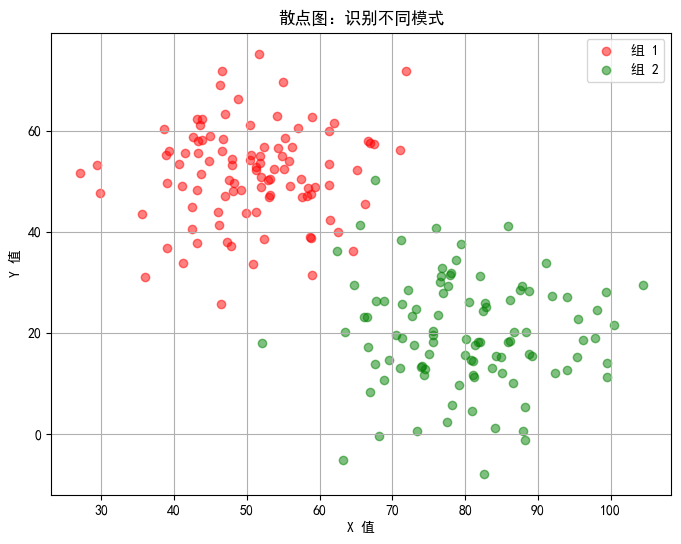

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei']
# 生成示例数据
np.random.seed(1)
x1 = np.random.normal(50, 10, 100)  
y1 = np.random.normal(50, 10, 100)

x2 = np.random.normal(80, 10, 100)  
y2 = np.random.normal(20, 10, 100)

# 绘制点图
plt.figure(figsize=(8, 6))
plt.scatter(x1, y1, color='red', alpha=0.5, label='组 1')
plt.scatter(x2, y2, color='green', alpha=0.5, label='组 2')
plt.title('散点图：识别不同模式')
plt.xlabel('X 值')
plt.ylabel('Y 值')
plt.legend()
plt.grid()
plt.show()


上图展示了点图的识别模式的用途，整体上，这个散点图通过颜色区分了两组数据，帮助观察者快速识别出不同的分布模式。

* 适用场景
    1. 科学研究：用于展示实验数据中变量之间的关系。
    2. 经济学：分析市场趋势、消费者行为等。
    3. 社会科学：研究社会现象中不同变量的相互影响。
    4. 机器学习：可用于可视化特征之间的关系，以评估模型输入的相关性。

## 2.示例

In [21]:
import pandas as pd
df = pd.read_csv("Health_Sleep_Statistics.csv")
df

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,43,m,7,00:45,07:15,6500,2400,medium,medium,no,no
96,97,33,f,8,23:15,06:15,8500,2600,high,medium,no,no
97,98,46,m,4,01:30,07:00,3000,2000,low,unhealthy,yes,yes
98,99,25,f,9,22:15,06:45,9500,2700,high,healthy,no,no


In [32]:
bins = range(3000, 11000, 1000)  # 年龄范围从20到50，每组5年
steps_groups = pd.cut(df['Daily Steps'], bins=bins, right=False)

# 按每日步数和性别分组计算平均睡眠质量，并保留一位小数
grouped_df = df.groupby([steps_groups, 'Gender'])['Sleep Quality'].mean().unstack().round(1)
  
grouped_df = grouped_df.round(1)

# 填充缺失值
for gender in grouped_df.columns:
    for idx in grouped_df.index:
        if pd.isna(grouped_df.loc[idx, gender]):
            prev_index = grouped_df.index.get_loc(idx) - 1
            if prev_index >= 0:
                prev_value = grouped_df.iloc[prev_index][gender]
                grouped_df.loc[idx, gender] = round(prev_value + np.random.rand(), 1)

grouped_df

C:\Users\qinglan\AppData\Local\Temp\ipykernel_24216\2561750311.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby([steps_groups, 'Gender'])['Sleep Quality'].mean().unstack().round(1)


Gender,f,m
Daily Steps,,
"[3000, 4000)",5.0,4.2
"[4000, 5000)",5.4,5.0
"[5000, 6000)",6.3,6.2
"[6000, 7000)",6.9,6.8
"[7000, 8000)",8.0,6.8
"[8000, 9000)",8.0,7.3
"[9000, 10000)",8.8,8.2


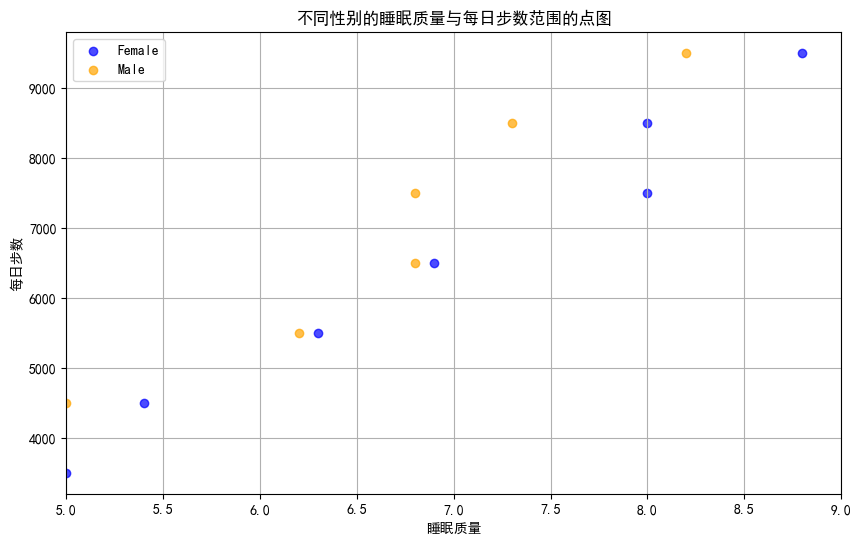

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# 提取数据
x_f = grouped_df['f'].values  
x_m = grouped_df['m'].values  

y_values = [(interval.left + interval.right) / 2 for interval in grouped_df.index]

# 创建点图
plt.figure(figsize=(10, 6))

plt.scatter(x_f, y_values, label='Female', color='blue', alpha=0.7)
plt.scatter(x_m, y_values, label='Male', color='orange', alpha=0.7)

# 添加标题和标签
plt.title('不同性别的睡眠质量与每日步数范围的点图')
plt.xlabel('睡眠质量')
plt.ylabel('每日步数')
plt.xlim(5, 9)  
plt.grid()
plt.legend()  
plt.show()


以上图不难发现和柱形图的相通之处。相较之下点图的图形元素更加简洁，制图时不会显得太拥挤，我们可以视情况择一作为表达工具。

## 3.绘制方法
在 Python 中，绘制条形图可以使用多个可视化库，比如 seaborn 和 plotly。以下是使用这两个库绘制基本点图的示例及其说明。

In [42]:
# 创建示例数据集
np.random.seed(42)
data = {
    '学习时间': np.round(np.random.uniform(1, 10, 100), 1),  # 随机生成学习时间（1到10小时），保留一位小数
    '考试成绩': np.round(np.random.uniform(50, 100, 100), 1),  # 随机生成考试成绩（50到100分），保留一位小数
    '性别': np.random.choice(['男', '女'], 100)  # 随机生成性别
}

df = pd.DataFrame(data)
df

,学习时间,考试成绩,性别
0,4.4,51.6,女
1,9.6,81.8,女
2,7.6,65.7,男
3,6.4,75.4,男
4,2.4,95.4,女
...,...,...,...
95,5.4,67.5,男
96,5.7,86.3,男
97,4.8,94.9,女
98,1.2,94.4,男


1. 使用Seaborn

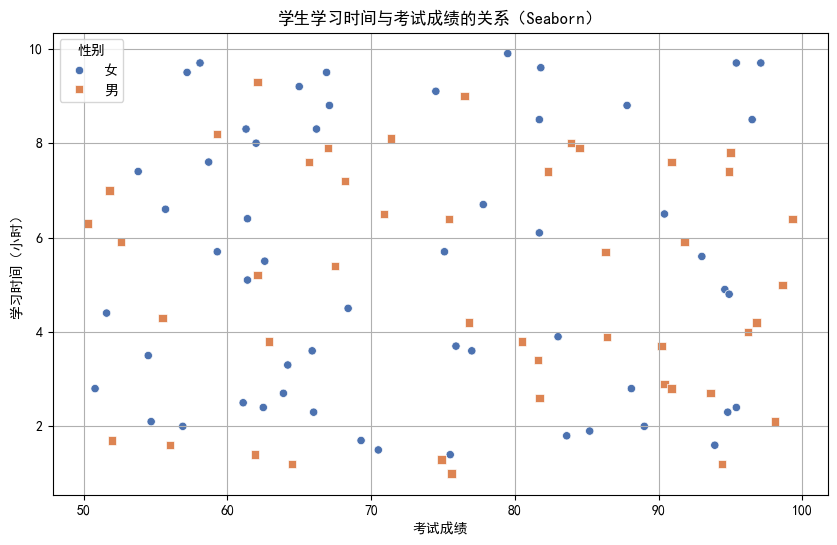

In [43]:
import seaborn as sns

# 绘制点图
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='考试成绩', y='学习时间', hue='性别', style='性别', palette='deep', markers=["o", "s"])

# 添加标题和标签
plt.title('学生学习时间与考试成绩的关系（Seaborn）')
plt.xlabel('考试成绩')
plt.ylabel('学习时间（小时）')
plt.grid()
plt.show()


说明：
* sns.scatterplot: Seaborn 的点图绘制函数。
* data: 数据源，这里是一个 DataFrame。
* x 和 y: 指定 x 轴和 y 轴的数据列。
* hue: 根据不同的类别（如性别）上色。
* style: 根据不同的类别设置点的样式。
* palette: 设置调色板，可以选择不同的颜色方案。
* markers: 自定义不同类别的点形状。

2. 使用Plotly绘制点图

In [44]:
import plotly.express as px

# 绘制点图
fig = px.scatter(df, x='考试成绩', y='学习时间', color='性别', symbol='性别',
                 title='学生学习时间与考试成绩的关系（Plotly）')

# 显示图形
fig.update_layout(xaxis_title='考试成绩', yaxis_title='学习时间（小时）')
fig.show()


说明：
* px.scatter: Plotly Express 的点图绘制函数。
* x 和 y: 指定 x 轴和 y 轴的数据列。
* color: 根据不同的类别（如性别）上色。
* symbol: 根据不同的类别设置点的样式。
* title: 图表的标题。
* update_layout: 用于进一步设置图表的布局和样式。

## 总结：
* Seaborn: 适用于快速绘制美观的统计图，提供多种内置配色和样式。
* Plotly: 适合交互式图表，用户可以通过鼠标悬停和缩放与图表交互。